# Build a model to predict/prognosis that shows a person's chance of surviving from a breast cancer disease





![hero_536_js-male-breast-cancer-the-disease-no-ones-talking-about.jpg](attachment:hero_536_js-male-breast-cancer-the-disease-no-ones-talking-about.jpg)

![Breastcancer.jpg](attachment:Breastcancer.jpg)

# Objective: -

Breast cancer is one of the types of cancer that starts in the breast. It occurs in women, but men can get breast cancer too. It is the second leading cause of death in women. 

The early diagnosis of Breast Cancer can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. 

The goal of this challenge is to build a machine learning model that predicts the chances of a patient surviving from breast cancer.


# Dataset: -

This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:



You have a dataset of over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:

1. Patient_ID: ID of the patient
2. Age: Age of the patient
3. Gender: Gender of the patient
4. Protein1, Protein2, Protein3, Protein4: expression levels
5. Tumor_Stage: Breast cancer stage of the patient
6. Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
7. ER status: Positive/Negative
8. PR status: Positive/Negative
9. HER2 status: Positive/Negative
10. Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
11. DateofSurgery: The date of Surgery
12. DateofLast_Visit: The date of the last visit of the patient
13. Patient_Status: Alive/Dead

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [ ]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [ ]:
#loading the dataset
try:
    df = pd.read_csv('/Users/amitpandey/Downloads/BRCA.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [ ]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head(-5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.244270,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [ ]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 341 rows and 16 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "Patient_Status" column which says if the patient is Alive or Dead.

In [ ]:
df['Patient_Status'].value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

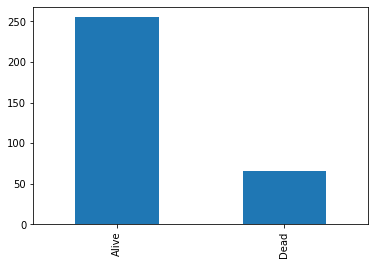

In [ ]:
# Visuallizing Patient_Status 
df.Patient_Status.value_counts().plot(kind="bar")
plt.show()

In [ ]:
df.shape

(341, 16)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [ ]:
df.iloc[1]

Patient_ID                  TCGA-EW-A1OX
Age                                 43.0
Gender                            FEMALE
Protein1                        -0.42032
Protein2                         0.57807
Protein3                         0.61447
Protein4                       -0.031505
Tumour_Stage                          II
Histology             Mucinous Carcinoma
ER status                       Positive
PR status                       Positive
HER2 status                     Negative
Surgery_type                  Lumpectomy
Date_of_Surgery                26-Apr-17
Date_of_Last_Visit             09-Nov-18
Patient_Status                      Dead
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [ ]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [ ]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  11
There names are as follows:  ['Patient_ID', 'Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status']


In [ ]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [ ]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  0
There names are as follows:  []


In [ ]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [ ]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  5
There name are as follow:  ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']


#### In the dataset , the column named as "Patient_ID", we will count the unique values of Patient_ID column which is shown below and also the length of dataset.

In [ ]:
len(df['Patient_ID'].unique()), df.shape[0]

(335, 341)

 - If the uniqueness of "Patient_Id" column and length of the dataset both are same that means there is no sense to keep id column so we have to drop that column:
 - But that's not the case.

In [ ]:
# dropping categorical columns with high cardinality and with only unique value
df = df.drop(['Patient_ID', 'ER status', 'PR status'], axis=1)

In [ ]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 341 rows and 13 columns


## Step 2 Insights: -

1) We have total 12 features where 5 of them are float type and rest of them are object type.
2) Drop "Patient_ID", "ER status" & "PR status" columns.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [ ]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

![Standard-Deviation-ADD-SOURCE-e838b9dcfb89406e836ccad58278f4cd.jpg](attachment:Standard-Deviation-ADD-SOURCE-e838b9dcfb89406e836ccad58278f4cd.jpg)

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [ ]:
df.std()

Age         12.961212
Protein1     0.563588
Protein2     0.911637
Protein3     0.585175
Protein4     0.629055
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [ ]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [ ]:
std_cal(df, float64_lst)

,normal_value,zero_value
0,5,0


In [ ]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,0,0


zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

![0_5NGAJWo_3-DsLKoV.png](attachment:0_5NGAJWo_3-DsLKoV.png)

![Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg](attachment:Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg)

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [ ]:
df.var()

Age         167.993023
Protein1      0.317631
Protein2      0.831082
Protein3      0.342430
Protein4      0.395710
dtype: float64

#### We can also understand the Variance using the below function.

In [ ]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [ ]:
var_cal(df, float64_lst)

,normal_value,zero_value
0,5,0


In [ ]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,0,0


zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

![1_tjAEMZx_0uIYGUhxEnPXPw.png](attachment:1_tjAEMZx_0uIYGUhxEnPXPw.png)

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [ ]:
df.mean()

Age         58.886228
Protein1    -0.029991
Protein2     0.946896
Protein3    -0.090204
Protein4     0.009819
dtype: float64

#### We can also understand the mean using the below function. 

In [ ]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [ ]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,0,0


In [ ]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,3,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
![Alg1_14_02_0011-diagram_thumb-lg.png](attachment:Alg1_14_02_0011-diagram_thumb-lg.png)

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [ ]:
df.median()

Age         58.000000
Protein1     0.006129
Protein2     0.992805
Protein3    -0.173180
Protein4     0.041768
dtype: float64

####  We can also understand the median using the below function. 

In [ ]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [ ]:
median_cal(df, float64_lst)

,normal_value,zero_value
0,3,0


zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
![Mode-1.png.webp](attachment:Mode-1.png.webp)
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [ ]:
df.mode()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,59.0,FEMALE,0.0,-0.97873,-1.6274,-0.3507,II,Infiltrating Ductal Carcinoma,Negative,Other,06-Dec-18,03-Feb-21,Alive
1,NaN,NaN,NaN,-0.94513,-1.3071,NaN,NaN,NaN,NaN,NaN,06-Nov-18,09-Aug-19,NaN
2,NaN,NaN,NaN,-0.87612,-1.2537,NaN,NaN,NaN,NaN,NaN,16-Nov-18,09-Feb-20,NaN
3,NaN,NaN,NaN,-0.87178,-1.1825,NaN,NaN,NaN,NaN,NaN,26-Nov-18,13-Feb-21,NaN
4,NaN,NaN,NaN,-0.87132,-1.1074,NaN,NaN,NaN,NaN,NaN,NaN,15-Jan-20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,2.67390,1.5070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,2.70560,1.6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,2.75130,1.7019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,2.76600,1.7691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [ ]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,1,1,0


zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values


1. **Null Values**


![missing-values.png](attachment:missing-values.png)

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [ ]:
df.isnull().sum()

Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

As we notice that there are null values in our dataset.

2. **Nan Values**

![images.png](attachment:images.png)

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [ ]:
df.isna().sum()

Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

As we notice that there are nan values in our dataset.

In [ ]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Here, we gonna check if we were successful in removing NULL/NAN Values from df
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [ ]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


# Count of unique occurences of every value in all categorical value



In [ ]:
object = ['Gender', 'Tumour_Stage', 
         'Histology', 
          'HER2 status', 'Surgery_type', 
          'Date_of_Surgery', 'Date_of_Last_Visit',
        'Patient_Status']
for value in object:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Gender     FEMALE    313
MALE        4
Name: Gender, dtype: int64
Tumour_Stage II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64
Histology  Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64
HER2 status Negative    288
Positive     29
Name: HER2 status, dtype: int64
Surgery_type Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64
Date_of_Surgery 06-Dec-18    5
06-Nov-18    5
16-Dec-18    4
27-Oct-18    4
26-Nov-18    4
            ..
22-Sep-17    1
12-Sep-17    1
02-Sep-17    1
23-Aug-17    1
21-Nov-19    1
Name: Date_of_Surgery, Length: 178, dtype: int64
Date_of_Last_Visit 20-Feb-20    3
09-Feb-20    3
09-Aug-19    3
13-Feb-21    3
15-Jan-20    3
            ..
14-Mar-22    1
03-Aug-19    1
04-Jun-24    1
27-Jan-21    1
19-Feb-21    1
Name: Date_of_Last_Visit, Le

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [ ]:
#Before Encoding
df['Patient_Status']

0      Alive
1       Dead
2      Alive
3      Alive
4       Dead
       ...  
329     Dead
330     Dead
331     Dead
332     Dead
333     Dead
Name: Patient_Status, Length: 317, dtype: object

In [ ]:
#df['label'] = le.fit_transform(df['label'])

In [ ]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Patient_Status'] = le.fit_transform(df['Patient_Status'])


In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Tumour_Stage'] = le.fit_transform(df['Tumour_Stage'])
df['Histology'] = le.fit_transform(df['Histology'])

df['HER2 status']  = le.fit_transform(df['HER2 status'])
df['Surgery_type'] = le.fit_transform(df['Surgery_type'])


In [ ]:
#After encoding or converting categorical col values into numbers
df['Patient_Status']


0      0
1      1
2      0
3      0
4      1
      ..
329    1
330    1
331    1
332    1
333    1
Name: Patient_Status, Length: 317, dtype: int64

In [ ]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,1,15-Jan-17,19-Jun-17,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,26-Apr-17,09-Nov-18,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,2,08-Sep-17,09-Jun-18,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,1,25-Jan-17,12-Jul-17,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,2,06-May-17,27-Jun-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0,0.231800,0.61804,-0.55779,-0.517350,2,0,1,3,11-Nov-19,09-Feb-20,1
330,44.0,1,0.732720,1.11170,-0.26952,-0.354920,1,1,0,2,01-Nov-19,04-Mar-20,1
331,61.0,0,-0.719470,2.54850,-0.15024,0.339680,1,0,0,0,11-Nov-19,18-Jan-21,1
332,79.0,0,0.479400,2.05590,-0.53136,-0.188480,0,0,1,0,21-Nov-19,19-Feb-21,1


In [ ]:
#Renamng a column 
df = df.rename({'HER2 status' : 'HER2_status'}, axis = 1)

In [ ]:
#df["ER status"] = df["ER status"].map({"Positive": 1})
#df["PR status"] = df["PR status"].map({"Positive": 1})

0 ~ A = Alive,
1 ~ D = Dead

In [ ]:
#To our model 'Date_of_Surgery', 'Date_of_Last_Visit' columns aren't useful so lets drop them
df = df.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    int64  
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    int64  
 7   Histology       317 non-null    int64  
 8   HER2_status     317 non-null    int64  
 9   Surgery_type    317 non-null    int64  
 10  Patient_Status  317 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 29.7 KB


In [ ]:
df['HER2_status'].value_counts()

0    288
1     29
Name: HER2_status, dtype: int64

In [ ]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,1,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,2,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,1,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0,0.231800,0.61804,-0.55779,-0.517350,2,0,1,3,1
330,44.0,1,0.732720,1.11170,-0.26952,-0.354920,1,1,0,2,1
331,61.0,0,-0.719470,2.54850,-0.15024,0.339680,1,0,0,0,1
332,79.0,0,0.479400,2.05590,-0.53136,-0.188480,0,0,1,0,1


In [ ]:
#sns.pairplot(df.iloc[:,1:5],hue="Patient_Status")

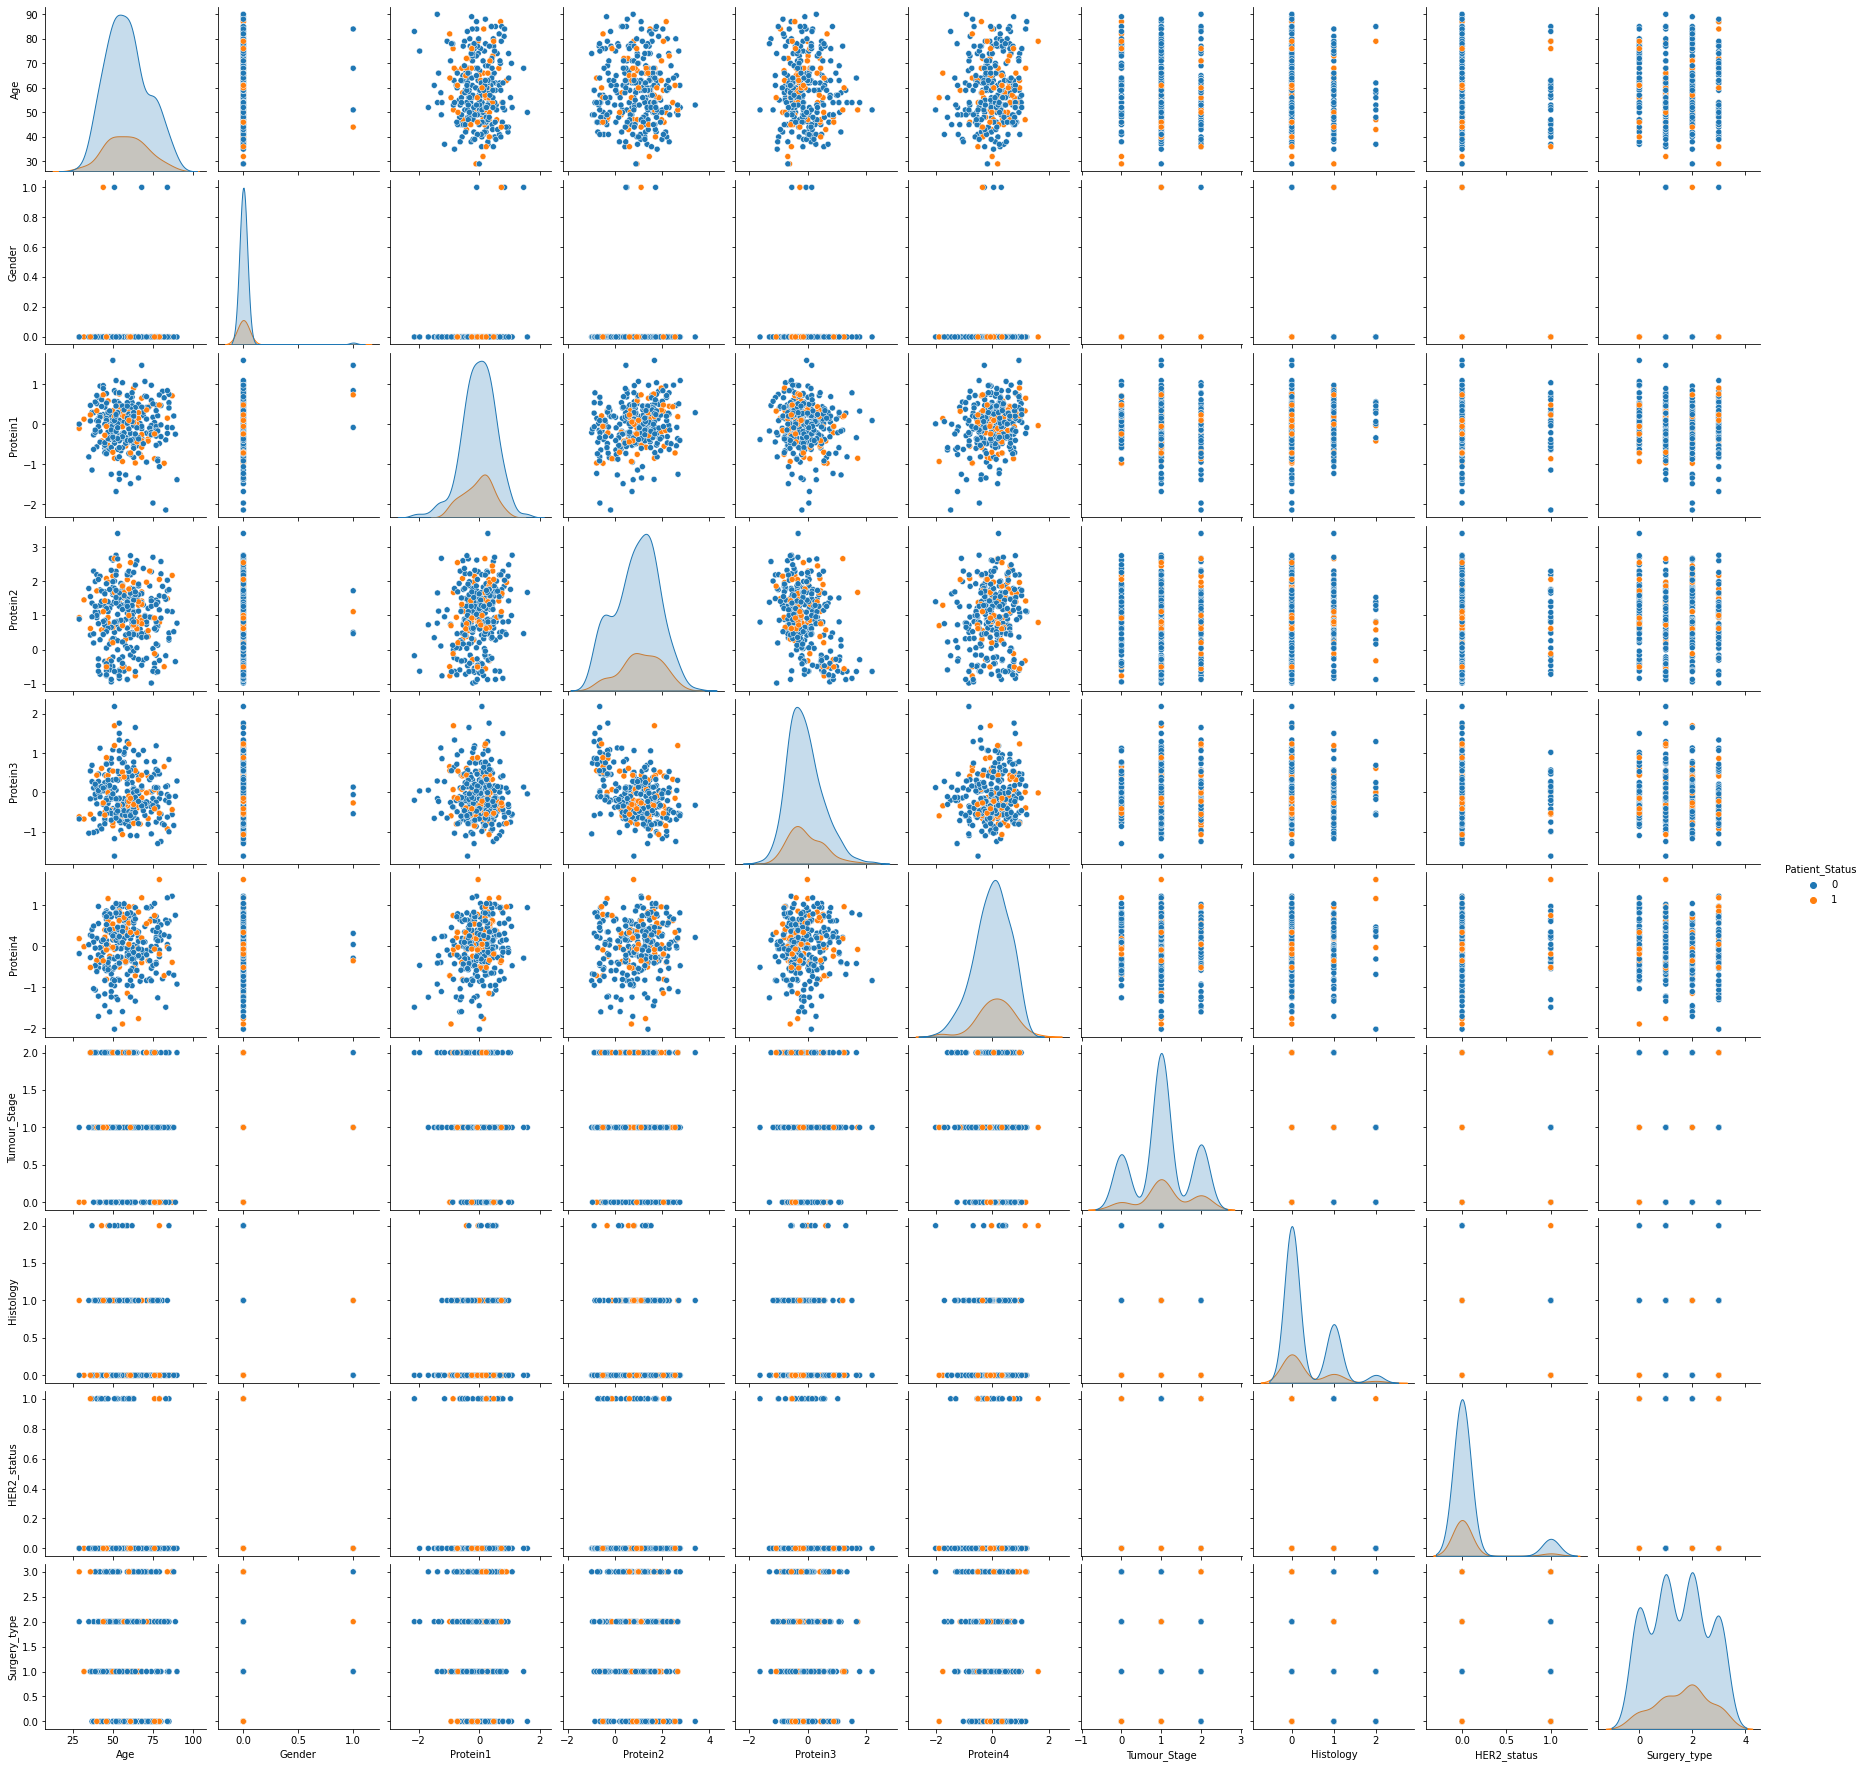

In [ ]:
# pair plot of features
sns.pairplot(df, hue="Patient_Status",
            vars =['Age', 'Gender', 
                   'Protein1', 'Protein2', 'Protein3', 'Protein4',
                   'Tumour_Stage', 
                   'Histology', 'HER2_status' , 'Surgery_type'])

#### 0 ~ A = Alive, 1 ~ D = Dead

* The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure
* Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

In [ ]:
df.head(15)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
0,36.0,0,0.080353,0.426380,0.547150,0.273680,2,0,0,1,0
1,43.0,0,-0.420320,0.578070,0.614470,-0.031505,1,2,0,0,1
2,69.0,0,0.213980,1.311400,-0.327470,-0.234260,2,0,0,2,0
3,56.0,0,0.345090,-0.211470,-0.193040,0.124270,1,0,0,1,0
4,56.0,0,0.221550,1.906800,0.520450,-0.311990,1,0,0,2,1
5,84.0,1,-0.081872,1.724100,-0.057335,0.043025,2,0,0,1,0
6,53.0,0,-0.069535,1.418300,-0.361050,0.391580,1,0,0,3,0
8,77.0,0,-0.151750,-0.663320,1.189400,0.217180,1,0,0,1,0
9,40.0,0,-0.565700,1.266800,-0.293460,0.193950,1,1,1,2,0
10,71.0,0,-0.223050,0.505940,-0.349430,-0.835300,1,0,0,0,0


# Skewness 

![Skewness_1.png.webp](attachment:Skewness_1.png.webp)

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [ ]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [ ]:
float64_cols = ['float64','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [ ]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Age,0.2857,positive (+ve) skewed
1,Protein1,-0.4655,negative (-ve) skewed
2,Protein2,-0.1938,negative (-ve) skewed
3,Protein3,0.7284,positive (+ve) skewed
4,Protein4,-0.4792,negative (-ve) skewed


In [ ]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,2,0,3


We notice with the above results that we have following details:
1. 2 columns are positive skewed & 3 columns are negative skewed



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

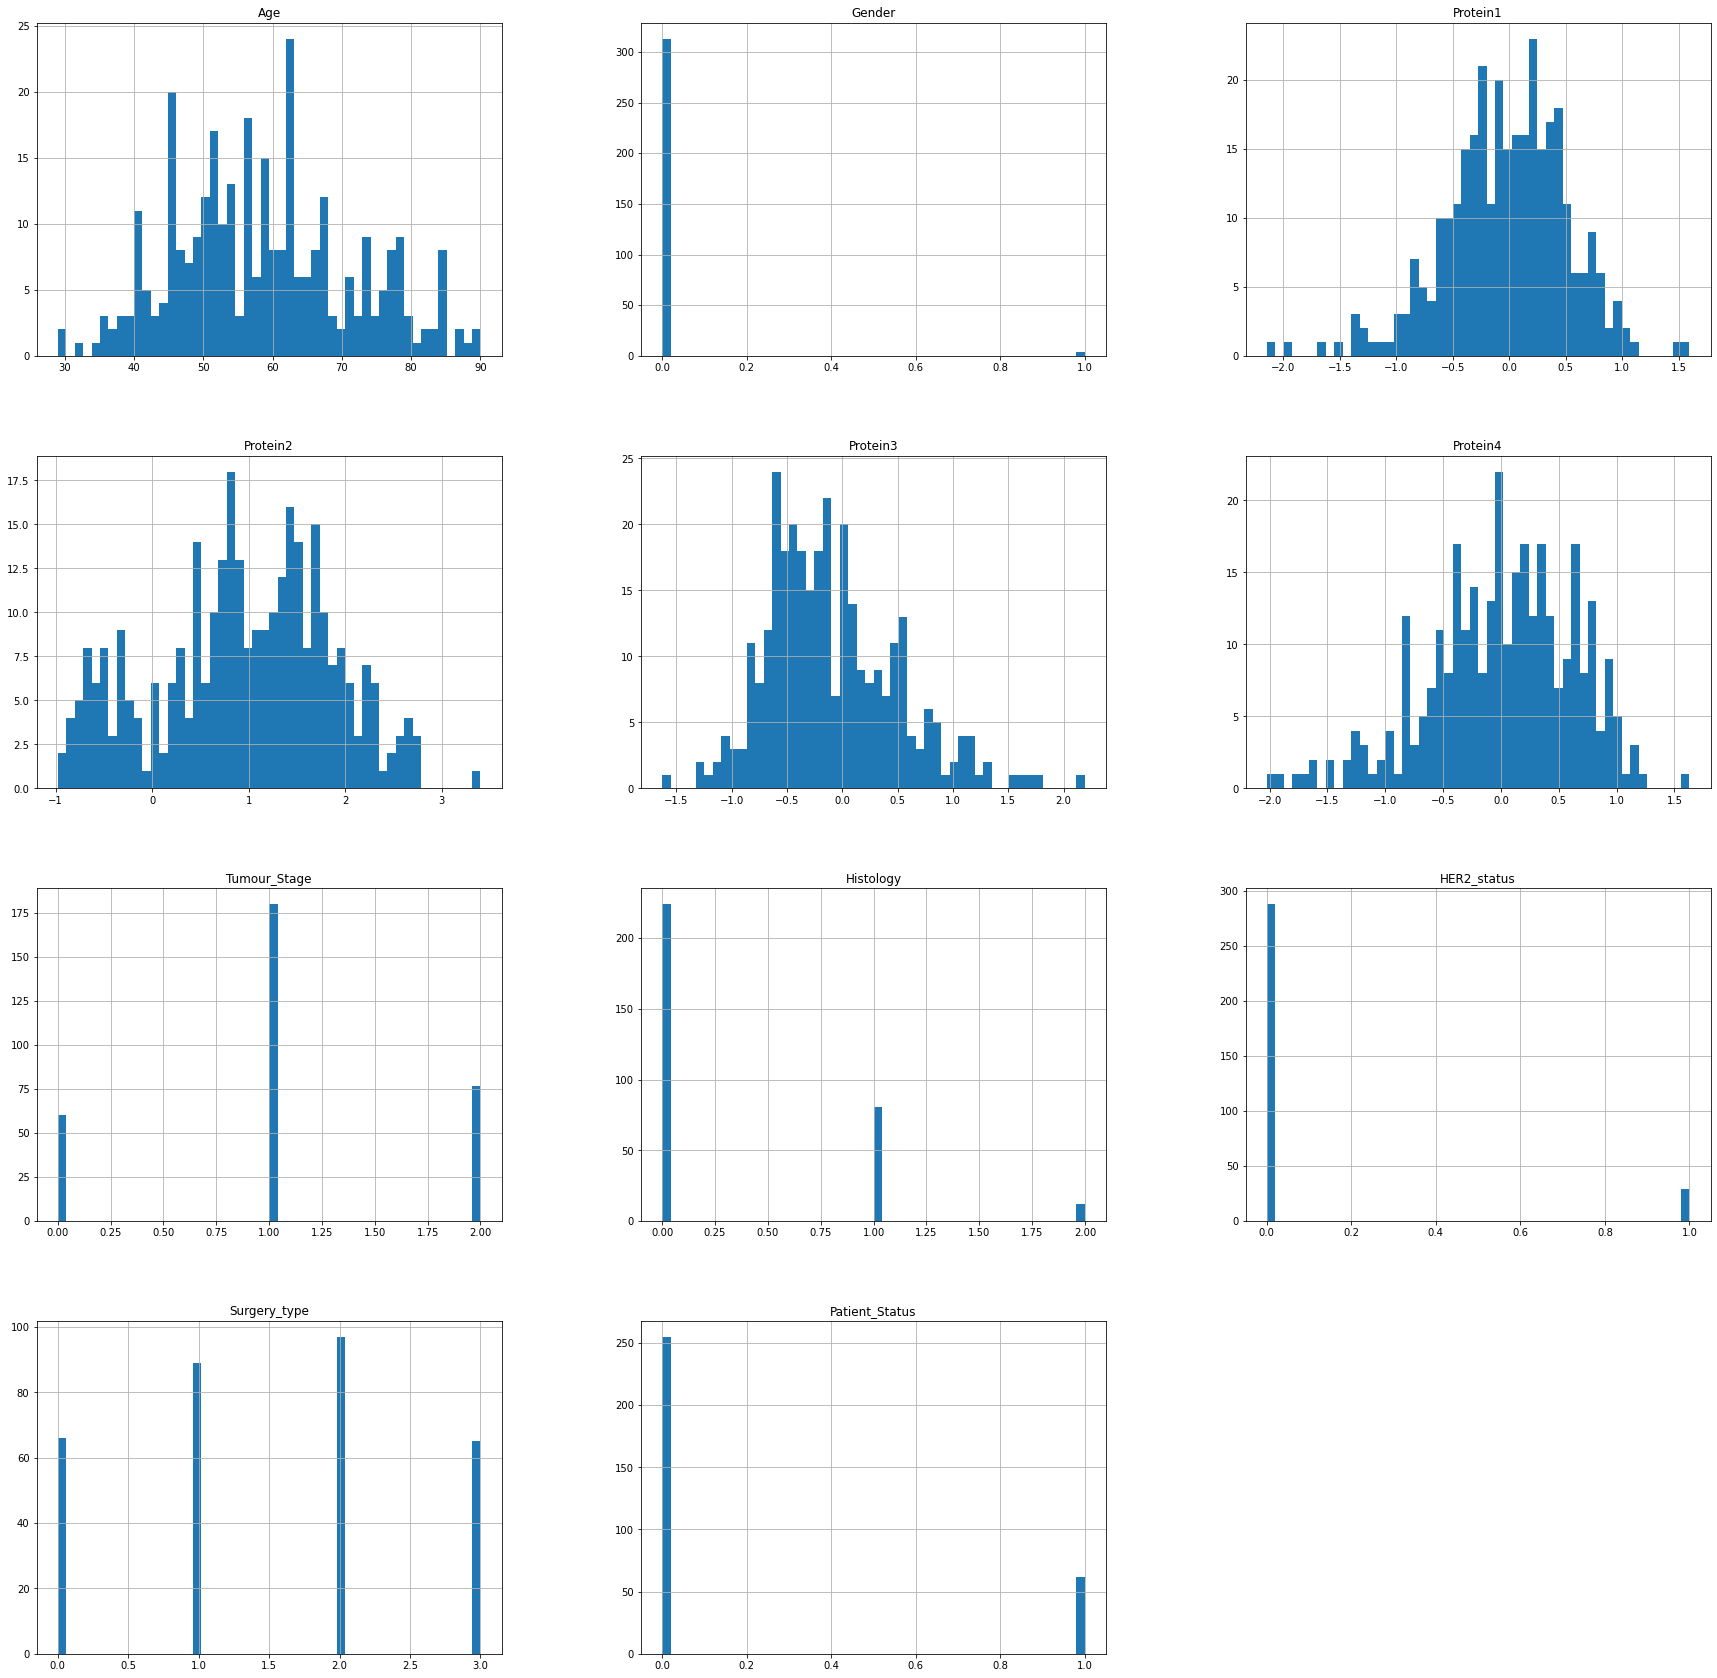

In [ ]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

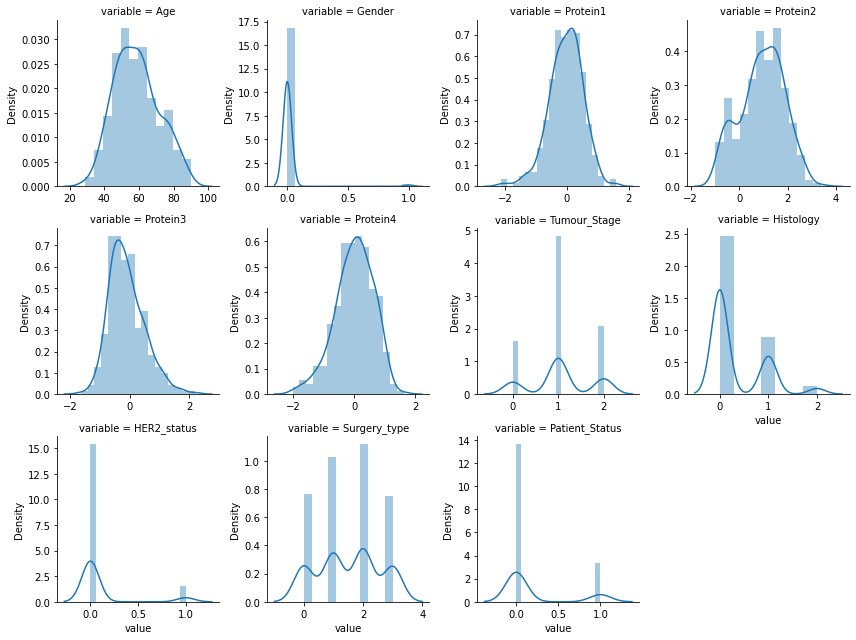

In [ ]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 5 columns are positive skewed & 5 are negative skewed
2. 1 column is added here i.e Patient_Status which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [ ]:
#+ve skewed 
df['Patient_Status'].skew()

1.5422472079161798

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



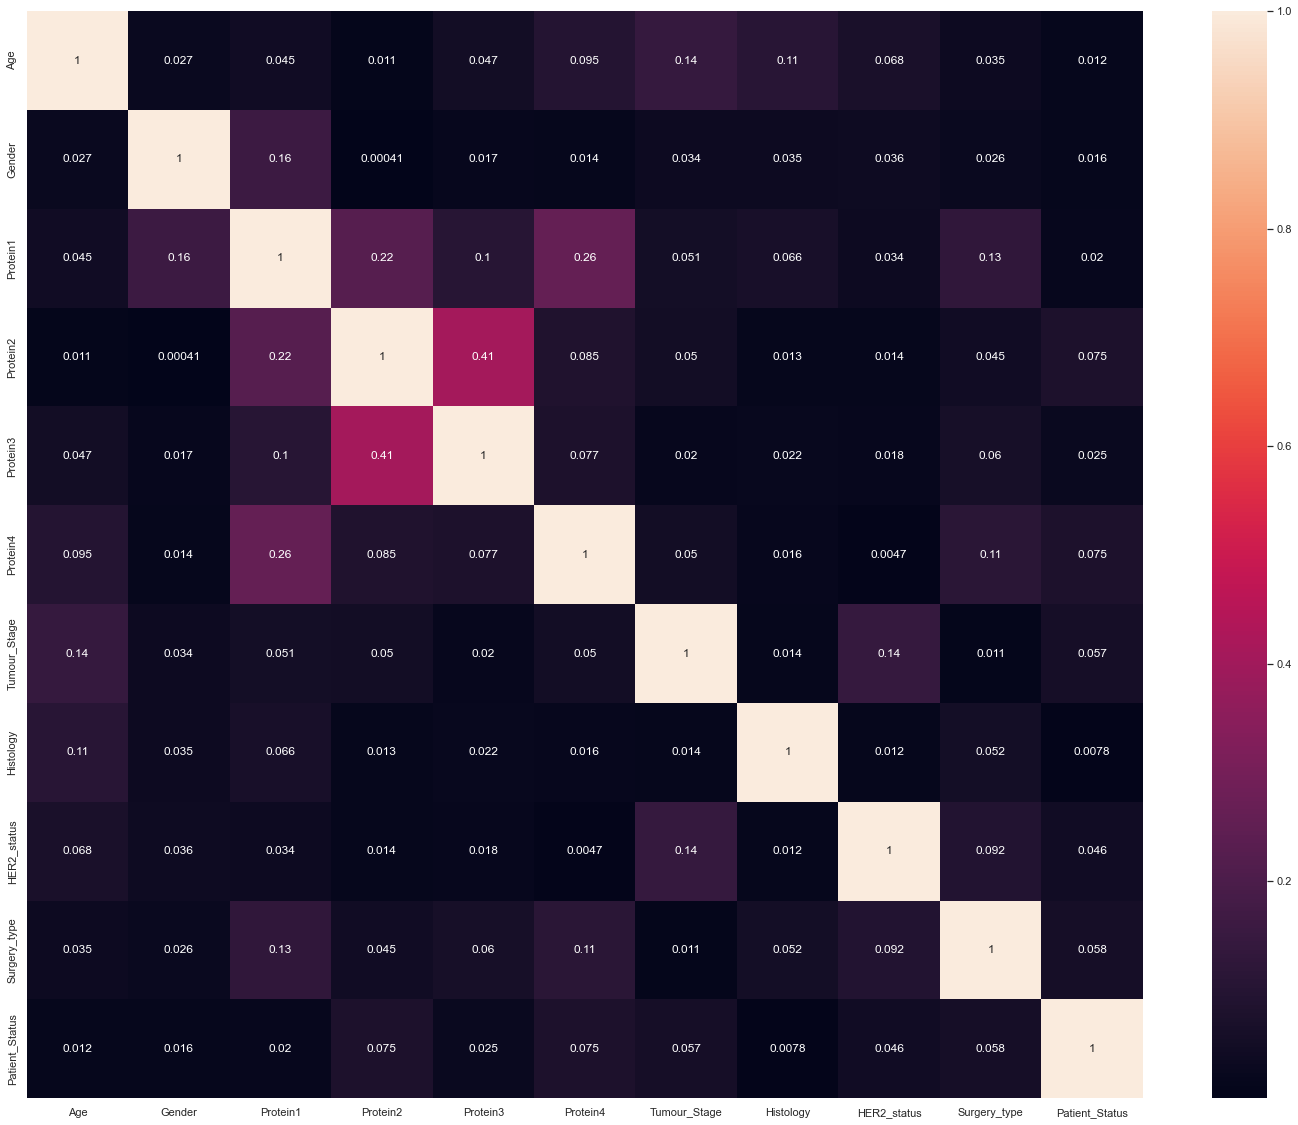

In [ ]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [ ]:
print (corr['Patient_Status'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Patient_Status'].sort_values(ascending=False)[-5:]) #last 5 values`

Patient_Status    1.000000
Protein4          0.074876
Protein2          0.074810
Surgery_type      0.057576
Tumour_Stage      0.056747
HER2_status       0.046123
Protein3          0.025305
Protein1          0.019805
Gender            0.015509
Age               0.012410
Histology         0.007823
Name: Patient_Status, dtype: float64 

----------------------
Protein3     0.025305
Protein1     0.019805
Gender       0.015509
Age          0.012410
Histology    0.007823
Name: Patient_Status, dtype: float64


Here we see that the concave points_worst feature is 79% correlated with the target variable. Concave points represent the number of indentations present on the nuclear border.This parameter was found to be statistically significant (P < 0.0001) in differentiating hyperplasia from carcinoma.

In [ ]:
corr

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
Age,1.000000,0.026696,0.044541,0.011387,0.047362,0.095417,0.144483,0.107611,0.068386,0.034617,0.012410
Gender,0.026696,1.000000,0.159685,0.000406,0.017109,0.014185,0.033881,0.034995,0.035872,0.026380,0.015509
Protein1,0.044541,0.159685,1.000000,0.223093,0.103046,0.259171,0.051447,0.066462,0.033544,0.127882,0.019805
Protein2,0.011387,0.000406,0.223093,1.000000,0.407670,0.084939,0.049881,0.013074,0.013568,0.045292,0.074810
Protein3,0.047362,0.017109,0.103046,0.407670,1.000000,0.076759,0.019770,0.022359,0.017628,0.059958,0.025305
Protein4,0.095417,0.014185,0.259171,0.084939,0.076759,1.000000,0.050364,0.016289,0.004728,0.113382,0.074876
Tumour_Stage,0.144483,0.033881,0.051447,0.049881,0.019770,0.050364,1.000000,0.014403,0.141031,0.010979,0.056747
Histology,0.107611,0.034995,0.066462,0.013074,0.022359,0.016289,0.014403,1.000000,0.012156,0.052023,0.007823
HER2_status,0.068386,0.035872,0.033544,0.013568,0.017628,0.004728,0.141031,0.012156,1.000000,0.092058,0.046123
Surgery_type,0.034617,0.026380,0.127882,0.045292,0.059958,0.113382,0.010979,0.052023,0.092058,1.000000,0.057576


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [ ]:
to_drop

[]

These are the columns that we have to drop but there isnt any for now.

#### Here we are droping those columns
 * df.drop(columns = ['lable'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,1,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,2,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,1,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    int64  
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    int64  
 7   Histology       317 non-null    int64  
 8   HER2_status     317 non-null    int64  
 9   Surgery_type    317 non-null    int64  
 10  Patient_Status  317 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 37.8 KB


Here, we are checking which columns we have after "to-drop".

# 4. Boxplot

![211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png](attachment:211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png)

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [ ]:
features = ['Age','Gender',
            'Protein1', 'Protein2', 
            'Protein3', 
            'Protein4',
            'Tumour_Stage',
            'Histology', 'HER2_status','Surgery_type' ]

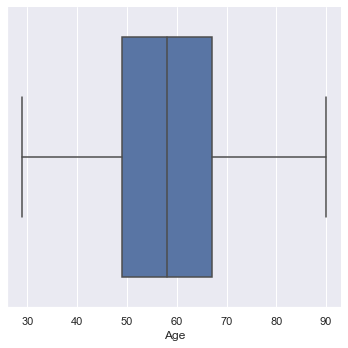

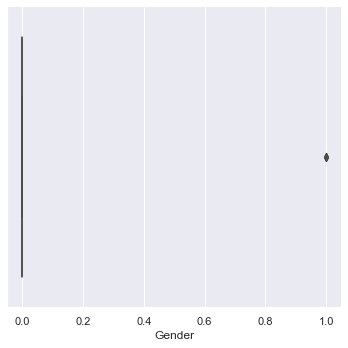

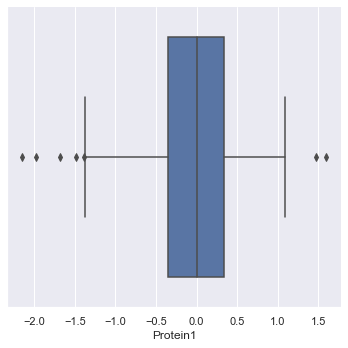

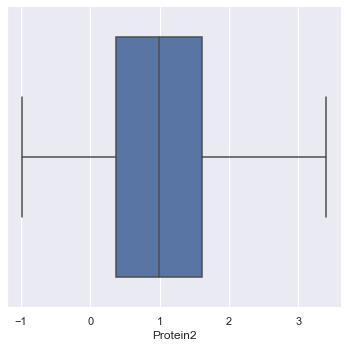

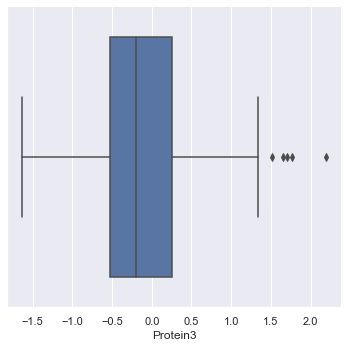

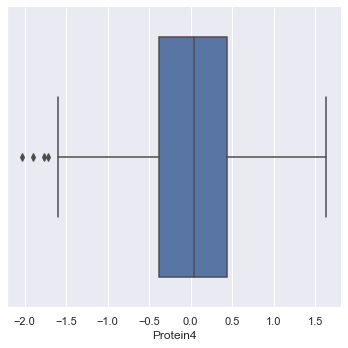

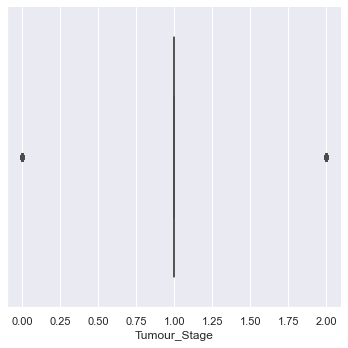

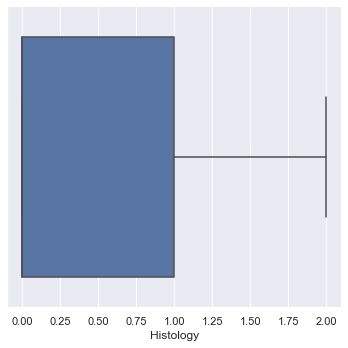

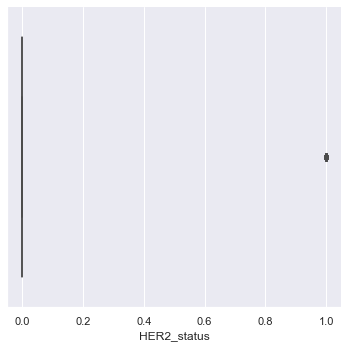

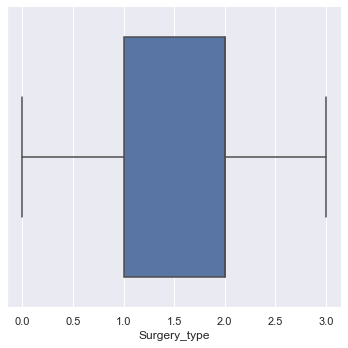

In [ ]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

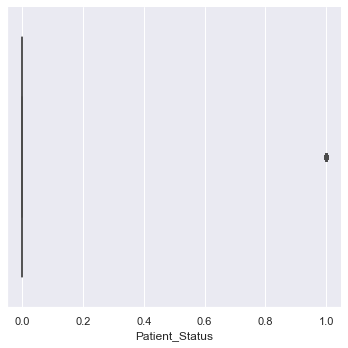

In [ ]:
#for target variable
sns.catplot(data=df, x='Patient_Status', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [ ]:
# Separate target and feature column in X and y variable

target = 'Patient_Status'

# X will be the features
X = df.drop(target,axis=1)
#y will be the target variable
y = df[target]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           317 non-null    float64
 1   Gender        317 non-null    int64  
 2   Protein1      317 non-null    float64
 3   Protein2      317 non-null    float64
 4   Protein3      317 non-null    float64
 5   Protein4      317 non-null    float64
 6   Tumour_Stage  317 non-null    int64  
 7   Histology     317 non-null    int64  
 8   HER2_status   317 non-null    int64  
 9   Surgery_type  317 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 35.3 KB


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
329    1
330    1
331    1
332    1
333    1
Name: Patient_Status, Length: 317, dtype: int64

In [ ]:
# Check the shape of X and y variable
X.shape, y.shape

((317, 10), (317,))

In [ ]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [ ]:
# Again check the shape of X and y variable
X.shape, y.shape

((317, 10), (317, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [ ]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((253, 10), (64, 10), (253, 1), (64, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Logistic Regression
2. KNearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [ ]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

#### Train set cross-validation 

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.7984189723320159

In [ ]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.828125

In [ ]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.51887452, 0.43852901, 0.43852901, 0.34641016, 0.48989795,
       0.28284271, 0.56568542, 0.4       , 0.4472136 , 0.48989795])

In [ ]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.44178803325206617

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

![confusion-matrix.jpeg](attachment:confusion-matrix.jpeg)

#### This diagram helps in understanding the concept of confusion matrix. 

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

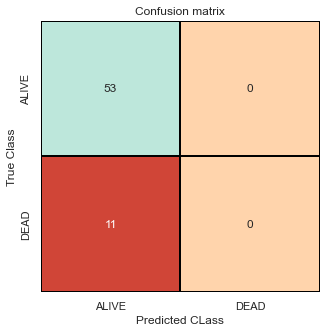

In [ ]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.yticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

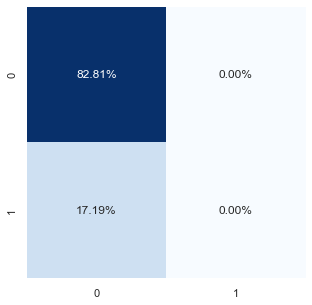

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 0.828125
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        53
           1       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



# 2. K Nearest Neighbor

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.8063241106719368

In [ ]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.796875

In [ ]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.51887452, 0.51887452, 0.51887452, 0.34641016, 0.52915026,
       0.4       , 0.63245553, 0.4472136 , 0.4472136 , 0.48989795])

In [ ]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.4848964660305234

### Prediction

In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

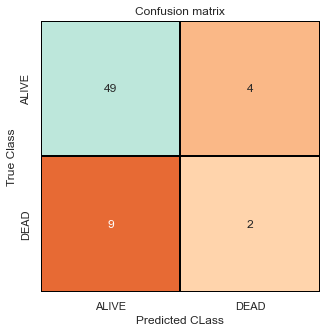

In [ ]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.yticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

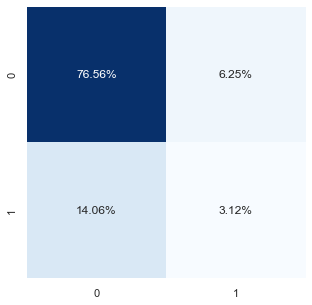

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 0.796875
The precision is: 0.3333333333333333
The recall is: 0.18181818181818182
The F1-Score is: 0.23529411764705885
Classification Report is:

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        53
           1       0.33      0.18      0.24        11

    accuracy                           0.80        64
   macro avg       0.59      0.55      0.56        64
weighted avg       0.76      0.80      0.77        64



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [ ]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.828125

In [ ]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.51887452, 0.48038446, 0.43852901, 0.34641016, 0.48989795,
       0.28284271, 0.56568542, 0.4       , 0.4472136 , 0.48989795])

In [ ]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.4459735784282408

### Prediction 

In [ ]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

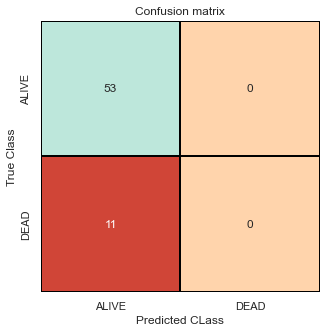

In [ ]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.yticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

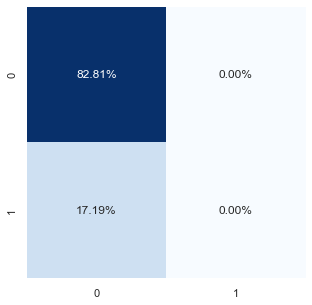

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 0.828125
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        53
           1       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



# Insight: -

In [ ]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbors',
                  'Random Forest']
cal_metric

,Score in percentage
Logistic Regression,0.828125
K-nearest Neighbors,0.796875
Random Forest,0.828125



- As you can see with our Logestic Regression Model(0.828125 or 82.81%) we are getting a better result even for the recall (1.00 or 100%) which is the most tricky part.
- So we gonna save our model with Logestic Regression Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [ ]:
import pickle
pickle.dump(log_R , open('breast_cancer_Logistic_Regression.pkl', 'wb'))
pickle.dump(classifier , open('breast_cancer_K-nearest_Neighbors.pkl', 'wb'))
pickle.dump(clas , open('breast_cancer_Random_Forest.pkl', 'wb'))

In [ ]:
import pickle

def model_prediction(features):
    

    pickled_model = pickle.load(open('breast_cancer_Logistic_Regression.pkl', 'rb'))
    Patient = str(list(pickled_model.predict(features)))
                         
                         
    return str(f'The Patient is {Patient}')
       
                         
                         
   
    
                       
 

#### We can test our model by giving our own parameters or features to predict. 

In [ ]:
df.iloc[0]

Age               36.000000
Gender             0.000000
Protein1           0.080353
Protein2           0.426380
Protein3           0.547150
Protein4           0.273680
Tumour_Stage       2.000000
Histology          0.000000
HER2_status        0.000000
Surgery_type       1.000000
Patient_Status     0.000000
Name: 0, dtype: float64

In [ ]:
# Prediction
#features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']]
features = [[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 2, 2,]]
print(model_prediction(features))

The Patient is [0]


0 ~ A = ALIVE, 1 ~ D = DEAD

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in classifying the survival chance of a person from the breast cancer.. The accuracy for the prediction is 82.81%  and it signifies the accurate prediction of the disease.  